In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn import preprocessing as pp
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# Preview data.
df = pd.read_csv("assets/article_tags_stat.csv")
df.head()

,nid,visits,tags
0,16708,11269,17
1,22365,10826,13
2,23694,10662,14
3,22741,10533,15
4,22569,10380,8


Text(0.5, 0, 'Yearly visits')

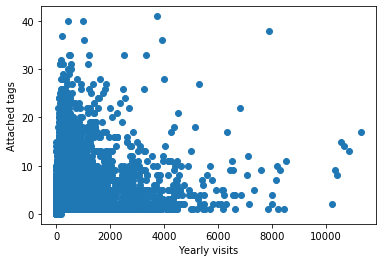

In [4]:
# Preview plot.
plt.scatter(df.visits, df.tags)
plt.ylabel('Attached tags')
plt.xlabel('Yearly visits')

Text(0.5, 0, 'Yearly visits')

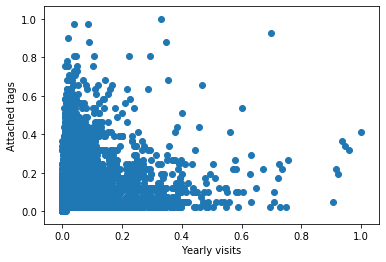

In [5]:
# Normalize to avoid skewed clustering and render.
mod = df.visits.values.reshape(-1, 1)
df.visits = pp.MinMaxScaler().fit_transform(mod)
mod = df.tags.values.reshape(-1, 1)
df.tags = pp.MinMaxScaler().fit_transform(mod)

plt.scatter(df.visits, df.tags)
plt.ylabel('Attached tags')
plt.xlabel('Yearly visits')

<ipython-input-6-1073221c4507>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.cluster = y_predicted


Text(0.5, 0, 'Yearly visits')

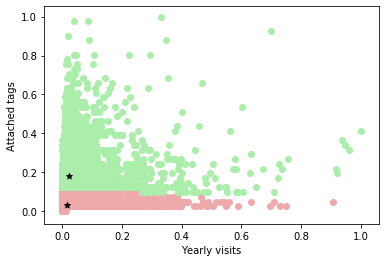

In [6]:
# Find clusters and render.
km = KMeans(n_clusters = 2)
y_predicted = km.fit_predict(df[['visits', 'tags']])
df.cluster = y_predicted

df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]

plt.scatter(df0.visits, df0.tags, color="#eeaaaa")
plt.scatter(df1.visits, df1.tags, color="#aaeeaa")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*')
plt.ylabel('Attached tags')
plt.xlabel('Yearly visits')

Text(0.5, 0, 'SSE')

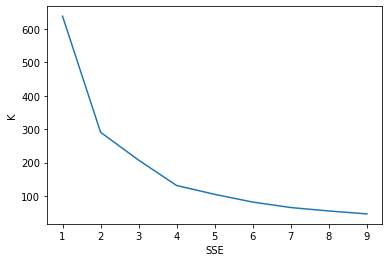

In [7]:
# Calculate the elbow.
krange = range(1, 10)
sse = []
for k in krange:
    km = KMeans(n_clusters = k)
    km.fit(df[['visits', 'tags']])
    sse.append(km.inertia_)
plt.plot(krange, sse)
plt.ylabel('K')
plt.xlabel('SSE')